# ルービンの因果モデル

**ルービンの因果モデル**（rubin causal model）は潜在的結果と割当のメカニズムに着目して因果推論を検討するアプローチ（[Rubin 1974](http://www.fsb.muohio.edu/lij14/420_paper_Rubin74.pdf), [Holland 1986](https://www.cps.fgv.br/cps/bd/curso/17_Statistics_and_Causal_Inference_Holland.pdf)）。


## 用語

### 潜在的結果

ある個体が「介入を受けた場合」と「介入を受けなかった場合」の結果を、実際に介入があったかどうかに関わらず定めたものを**潜在的結果**（potential outcome）という。

- **対照群**（control group）：介入を受けなかった（$D=0$の）場合
- **処置群**（treatment group）：介入を受けた（$D=1$の）場合
- 個体$i$が介入を受けなかった時の潜在的結果：$Y_i(0)$
- 個体$i$が介入を受けた時の潜在的結果：$Y_i(1)$


実際の観察結果は$Y_i$とする

$$
Y_i = \left\{
\begin{array}{l}
Y_i(0) \ \text{if } D_i = 0 \\
Y_i(1) \ \text{if } D_i=1
\end{array}
\right.
$$

次のように書くこともできる

$$
Y_i = Y_i(D_i) = Y_i(0)(1-D_i) + Y_i(1)D
$$


### 因果効果

因果の定義の仕方はいろいろあるが、ルービン因果モデルにおいては「ある個体が介入$D$を受けた場合に、受けなかった場合の結果$Y$と比べた結果$Y_1$の差$Y_1 - Y_0$」を「$D$の**因果効果**（causal effect）」とする。なお、因果効果と同様の意味で**処置効果**（treatment effect）という言葉も使われる。

個体$i$の因果効果（**個体処置効果** individual treatment effect: ITE） は

$$
\tau_i = Y_i(1)-Y_i(0)
$$

となる。

ただし、実際には実行された処置についての結果しか観測することができないため、$\tau_i$は観測することはできない。このことは**因果推論の根本問題**と呼ばれる。

#### 平均処置効果

ITEの推定は難しいため、通常は平均での処置効果を推定することを考える

$$
\tau = E[Y(1) - Y(0)] = E[Y(1)] - E[Y(0)]
$$

これを**平均処置効果**（average treatment effect: ATE）という。**平均因果効果**（average causal effect: ACE）という呼び方や、母集団レベルの議論であることを明示した**母集団平均処置効果**（population average treatment effect: PATE）という呼び方も存在する。


## ATEの推定

### ナイーブな推定量

単純には実現して観測できる各群の差

$$
\frac{1}{N_1} \sum^{N_1}_{i: D_i = 1} y_i
-
\frac{1}{N_0} \sum^{N_0}_{i: D_i = 0} y_i
$$

を使って推定したくなる。これは潜在的結果を使って表すと

$$
\tau_{naive} = E[Y(1)|D = 1] - E[Y(0)|D = 0]
$$

となり、ATEとは異なる。仮にこれをナイーブな推定量と呼ぶことにして、$\tau_{naive}$と表す。
これは$E[Y(0)|D = 1]$を足して引くと

$$
\begin{align}
\tau_{naive}
&= E[Y(1)|D = 1] - E[Y(0)|D = 0]\\
&= E[Y(1)|D = 1] - E[Y(0)|D = 1] + E[Y(0)|D = 1] - E[Y(0)|D = 0]\\
&= \underbrace{E[Y(1) - Y(0)|D = 1]}_{\text{ATT}}
  + \underbrace{E[Y(0)|D = 1] - E[Y(0)|D = 0]}_{\text{Selection Bias}}\\
\end{align}
$$

と表すことができる。

第1項の$E[Y(1) - Y(0)|D = 1]$は処置群における「処置を受けたときの結果$Y(0)$」と「処置を受けなかった場合の（反実仮想の）結果$Y(0)$」の差である。これを**処置群に対する平均処置効果**（average treatment effect on the treated: ATT or ATET）という。
処置群と対照群で平均的に処置効果に差がないと仮定すれば

$$
\begin{align}
\underbrace{E[Y(1) - Y(0)]}_{ATE}
&= E[Y(1) - Y(0) | D = 1] P(D = 1) + E[Y(1) - Y(0)| D = 0] P(D = 0)\\
&= E[Y(1) - Y(0) | D = 1] \{ P(D = 1) + P(D = 0) \}\\
&= \underbrace{E[Y(1) - Y(0)|D = 1]}_{ATT}
\end{align}
$$

となる。

第2項の$E[Y(0)|D = 1] - E[Y(0)|D = 0]$は、「処置群が仮に処置を受けなかったとした場合の結果の期待値」と「対照群が処置を受けなかった場合の期待値」の差であり、**セレクション・バイアス**（selection bias）と呼ばれる。
もしセレクション・バイアスが0であれば$\tau_{naive} = ATT$であり、さらに$ATT=ATE$であれば$\tau_{naive}= ATE = \tau$になる。そうでない場合は$\tau_{naive} \neq \tau$であり、単純な各群の期待値の差をとる方法は誤った分析結果を導くことになる。


### 無作為割り当ての場合

もし処置への割当$D$が無作為（ランダム）であれば潜在的結果$Y(0), Y(1)$とは独立

$$
\newcommand{\indep}{\mathop{\hspace{0.1em} \perp\!\!\!\perp \hspace{0.1em}}}
(Y(0), Y(1)) \indep D
$$


となり

$$
E[Y(0)| D = 0] = E[Y(0)]\\
E[Y(1)| D = 1] = E[Y(1)]
$$

になるため、ナイーブな推定量がATEの推定量となる。

:::{marginal} 独立のおさらい

2つの事象AとBが独立であるとき、Aが起こる確率はBが起こったという事象とは関係ないため、

$$
P(A|B) = P(A)
$$

となる。


条件付き期待値も同様に

$$
\begin{align}
E[A|B]
&= \int A \times P(A|B) dA\\
&= \int A \times P(A) dA = E[A]
\end{align}
$$

となる
:::


### 条件付き独立を仮定する場合

共変量$\boldsymbol{X}$を条件付けた下での処置割当$D$と結果$Y(0), Y(1)$の独立

$$
\newcommand{\indep}{\mathop{\hspace{0.1em} \perp\!\!\!\perp \hspace{0.1em}}}
(Y(0), Y(1)) \indep D | \boldsymbol{X}
$$

を**条件付き独立**（conditional independence）あるいは**強く無視できる割り当て**（strongly ignorable treatment assignment）条件という。

これが仮定できるとき、


## 例：ダイレクトメール（DM）配布

あるサービスの広告目的でDMを配布するとする。

このとき、あらかじめ（DM施策以前から）成約率が高いことがわかっているエリアのみに配布したらどうなるだろうか。

例えば、成約率の高いエリアはもともとの成約率が0.3で、実際に実験時点においても$E[Y(0)|D=1] = 0.3$だったとする

実際に観測されたのは

$$
E[Y|D=1] = 0.4\\
E[Y|D=0] = 0.2
$$

だったとする。

両者の差分$\tau_{naive}$は$0.4-0.2=0.2$となる。

しかし、DMが配布されたエリアはもともと成約率が高かったので、セレクション・バイアス$E[Y(0)|D=1] - E[Y(0)|D=0] = 0.3 - 0.2 = 0.1$となり、$\tau_{naive}$は0.1だけ過大にATEを推定していることになる。

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
n = 1000
users = pd.DataFrame()

ate = 0.1  # 真の効果。成約率の増加分
p_target = 0.3  # DMの重点エリアの成約率
p_normal = 0.2  # それ以外のエリアの成約率

np.random.seed(0)
x_target = np.random.binomial(n=1, p=p_target + ate, size=n//2)
x_normal = np.random.binomial(n=1, p=p_normal, size=n//2)

print(f"""
観測した両群の成約率
avg[Y|D=1] = {x_target.mean():.2f}
avg[Y|D=0] = {x_normal.mean():.2f}

その差分
τ_naive = avg[Y|D=1] - avg[Y|D=0] = {x_target.mean() - x_normal.mean():.2f}

（反実仮想）対照群がもし処置を受けていなかったら
E[Y(0)|D=1] = {p_target:.2f}
""")


観測した両群の成約率
avg[Y|D=1] = 0.39
avg[Y|D=0] = 0.21

その差分
τ_naive = avg[Y|D=1] - avg[Y|D=0] = 0.18

（反実仮想）対照群がもし処置を受けていなかったら
E[Y(0)|D=1] = 0.30



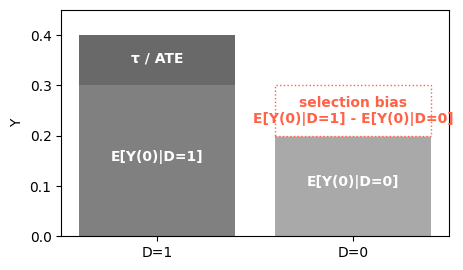

In [104]:
font_settings = dict(horizontalalignment="center", fontweight="bold")

fig, ax = plt.subplots(dpi=100, figsize=[5, 3])
ax.bar(0, p_target, color="gray")
ax.text(0, p_target * 0.5, "E[Y(0)|D=1]", color="white", **font_settings)

ax.bar(0, ate, bottom=p_target, color="dimgray")
ax.text(0, p_target + ate * 0.45, "τ / ATE", color="white", **font_settings)
# ax.text(0, p_target + ate * 1.2, "E[Y(1)|D=1]", color="dimgray", **font_settings)

ax.bar(1, p_normal, color="darkgray")
ax.text(1, p_normal * 0.5, "E[Y(0)|D=0]", color="white", **font_settings)

ax.bar(1, (p_target - p_normal), bottom=p_normal, color="white", linestyle=":", edgecolor="tomato")
ax.text(1, p_normal + (p_target - p_normal) * 0.25, "selection bias\nE[Y(0)|D=1] - E[Y(0)|D=0]", color="tomato", **font_settings)


ax.set(
    xticks=[0, 1],
    xticklabels=["D=1", "D=0"],
    ylabel="Y",
    ylim=[0, 0.45],
)
fig.show()

## 例：クーポンの配布

ECサイトにおいてクーポンをユーザーに配布する施策を行った状況を想定し、クーポンという処置が購入する確率に与えた影響を調べたいとする。その際に、

1. ランダムにクーポン配布が行われたケース
2. 前月に購入したユーザーにクーポンが配布されたケース

という2つの処置割当メカニズムがあったと仮定して比較を行う。クーポンは同じもので効果も同じとする。

また、ユーザーは通常の顧客と、成約率が高いロイヤルカスタマーの2種類いるとする。

乱数を生成してシミュレーションしてみる

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

ate = 0.1  # 真の効果
n = 1000
users = pd.DataFrame()

# 通常の顧客とロイヤルカスタマーの2つのグループがあり、毎月の成約率が異なるとする
p_normal = 0.2
p_loyal = 0.5

# ロイヤルカスタマーは全体の2割いるとする
is_loyal = np.random.binomial(n=1, p=0.2, size=n)

# 先月の購入の有無
p1 = is_loyal * np.random.binomial(n=1, p=p_loyal, size=n)
p2 = (1 - is_loyal) * np.random.binomial(n=1, p=p_normal, size=n)
users.loc[:, "prev_purchase"] = p1 + p2

# 1. ランダム配布の場合
d = np.random.binomial(n=1, p=0.5, size=n)
p1 = d * np.random.binomial(n=1, p=p_normal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_normal, size=n)
p2 = d * np.random.binomial(n=1, p=p_loyal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_loyal, size=n)
users.loc[:, "purchase_1"] = is_loyal * p1 + (1 - is_loyal) * p2
users.loc[:, "assignment_1"] = d

# 2. ユーザーを選ぶ場合
d = users["prev_purchase"]
p1 = d * np.random.binomial(n=1, p=p_normal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_normal, size=n)
p2 = d * np.random.binomial(n=1, p=p_loyal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_loyal, size=n)
users.loc[:, "purchase_2"] = is_loyal * p1 + (1 - is_loyal) * p2
users.loc[:, "assignment_2"] = d

# 各群の平均の差分をとって（ナイーブな推定量を使って）ATEを推定してみる
agg1 = users.groupby("assignment_1")["purchase_1"].agg(["mean", "count"])
agg2 = users.groupby("assignment_2")["purchase_2"].agg(["mean", "count"])
result = f"""
--- ナイーブな推定量 ---
1. ランダム配布の場合
対照群： 成約率={agg1['mean'][0]:.3g} n={agg1['count'][0]:,}
処置群： 成約率={agg1['mean'][1]:.3g} n={agg1['count'][1]:,}
成約率の差： {agg1['mean'][1] - agg1['mean'][0]:.3g}

2. ユーザーを選ぶ場合
対照群： 成約率={agg2['mean'][0]:.3g} n={agg2['count'][0]:,}
処置群： 成約率={agg2['mean'][1]:.3g} n={agg2['count'][1]:,}
成約率の差： {agg2['mean'][1] - agg2['mean'][0]:.3g}
"""
print(result)


--- ナイーブな推定量 ---
1. ランダム配布の場合
対照群： 成約率=0.454 n=533
処置群： 成約率=0.561 n=467
成約率の差： 0.107

2. ユーザーを選ぶ場合
対照群： 成約率=0.469 n=715
処置群： 成約率=0.477 n=285
成約率の差： 0.00866



In [ ]:
ゆーざーごとの固有の平均成約率がある

## 例：クーポンの配布

ECサイトにおいてクーポンをユーザーに配布する施策を行った状況を想定し、クーポンという処置が購入する確率に与えた影響を調べたいとする。その際に、

1. ランダムにクーポン配布が行われたケース
2. 前月に購入したユーザーにクーポンが配布されたケース

という2つの処置割当メカニズムがあったと仮定して比較を行う。クーポンは同じもので効果も同じとする。

また、ユーザーは通常の顧客と、成約率が高いロイヤルカスタマーの2種類いるとする。

乱数を生成してシミュレーションしてみる

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

ate = 0.1  # 真の効果
n = 1000
users = pd.DataFrame()

# 通常の顧客とロイヤルカスタマーの2つのグループがあり、毎月の成約率が異なるとする
p_normal = 0.2
p_loyal = 0.5

# ロイヤルカスタマーは全体の2割いるとする
is_loyal = np.random.binomial(n=1, p=0.2, size=n)

# 先月の購入の有無
p1 = is_loyal * np.random.binomial(n=1, p=p_loyal, size=n)
p2 = (1 - is_loyal) * np.random.binomial(n=1, p=p_normal, size=n)
users.loc[:, "prev_purchase"] = p1 + p2

# 1. ランダム配布の場合
d = np.random.binomial(n=1, p=0.5, size=n)
p1 = d * np.random.binomial(n=1, p=p_normal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_normal, size=n)
p2 = d * np.random.binomial(n=1, p=p_loyal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_loyal, size=n)
users.loc[:, "purchase_1"] = is_loyal * p1 + (1 - is_loyal) * p2
users.loc[:, "assignment_1"] = d

# 2. ユーザーを選ぶ場合
d = users["prev_purchase"]
p1 = d * np.random.binomial(n=1, p=p_normal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_normal, size=n)
p2 = d * np.random.binomial(n=1, p=p_loyal + ate, size=n) + (1 - d) * np.random.binomial(n=1, p=p_loyal, size=n)
users.loc[:, "purchase_2"] = is_loyal * p1 + (1 - is_loyal) * p2
users.loc[:, "assignment_2"] = d

# 各群の平均の差分をとって（ナイーブな推定量を使って）ATEを推定してみる
agg1 = users.groupby("assignment_1")["purchase_1"].agg(["mean", "count"])
agg2 = users.groupby("assignment_2")["purchase_2"].agg(["mean", "count"])
result = f"""
--- ナイーブな推定量 ---
1. ランダム配布の場合
対照群： 成約率={agg1['mean'][0]:.3g} n={agg1['count'][0]:,}
処置群： 成約率={agg1['mean'][1]:.3g} n={agg1['count'][1]:,}
成約率の差： {agg1['mean'][1] - agg1['mean'][0]:.3g}

2. ユーザーを選ぶ場合
対照群： 成約率={agg2['mean'][0]:.3g} n={agg2['count'][0]:,}
処置群： 成約率={agg2['mean'][1]:.3g} n={agg2['count'][1]:,}
成約率の差： {agg2['mean'][1] - agg2['mean'][0]:.3g}
"""
print(result)


--- ナイーブな推定量 ---
1. ランダム配布の場合
対照群： 成約率=0.454 n=533
処置群： 成約率=0.561 n=467
成約率の差： 0.107

2. ユーザーを選ぶ場合
対照群： 成約率=0.469 n=715
処置群： 成約率=0.477 n=285
成約率の差： 0.00866



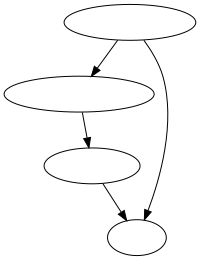

In [15]:
import graphviz
g = graphviz.Digraph()
g.edge('ロイヤルティ', '先月の購入履歴')
g.edge('先月の購入履歴', 'クーポン')
g.edge('クーポン', '購入')
g.edge('ロイヤルティ', '購入')
g

In [6]:
users.corr()

,prev_purchase,purchase_1,assignment_1,purchase_2,assignment_2
prev_purchase,1.000000,-0.082588,0.012899,0.007833,1.000000
purchase_1,-0.082588,1.000000,0.106764,0.010482,-0.082588
assignment_1,0.012899,0.106764,1.000000,-0.003843,0.012899
purchase_2,0.007833,0.010482,-0.003843,1.000000,0.007833
assignment_2,1.000000,-0.082588,0.012899,0.007833,1.000000


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

models = [
    smf.ols('purchase_2 ~ assignment_2', data=users).fit(),
    smf.ols('purchase_2 ~ assignment_2 + prev_purchase', data=users).fit(),
]
Stargazer(models)

## SUTVA条件

個体$i$の潜在的結果$Y_i(1), Y_i(0)$が次の2つの条件を満たすとき、**SUTVA**（stable unit treatment value assumption）条件を満たすという（Rubin 1980）。

1. 個体$i$の潜在的結果は、他の個体が受ける処置の値に依存しない
2. 個体$i$に対する処置は1通りに定まる


### 条件1について

条件1は相互干渉がない（no interference）という言い方もされる（Cox 1958）。

相互干渉がある場合、個体$i$の潜在的結果は個体$i$の処置$D_i$だけでは定まらず、$Y_i(D_1, \cdots, D_n)$のように書く必要が出てきてかなり複雑になる。
そのため、条件1は潜在的結果をシンプルに扱うための条件となる。

しかし現実には相互干渉が発生しうる。例えば労働者への教育プログラムの効果を推定する際には、他にもそのプログラムを受けて技能を向上させた労働者が多く現れる場合、労働市場における希少価値は低下し、結果として個体$i$の潜在的結果に影響を与えると考えられる。

### 条件2について

条件2は処置の内容を明確にすることを要請している。

例えば「ダイエットをする」という処置では、具体的に何をしたのかが人によって大きく異なる可能性がある。



## 余談：因果についての議論

[Holland 1986](https://www.cps.fgv.br/cps/bd/curso/17_Statistics_and_Causal_Inference_Holland.pdf)を参考に過去の因果についての考察を要約

### デイヴィッド・ヒューム（David Hume）






## 参考文献

[Rubin, D. B. (1974). Estimating causal effects of treatments in randomized and nonrandomized studies. Journal of educational Psychology, 66(5), 688.](http://www.fsb.muohio.edu/lij14/420_paper_Rubin74.pdf)

[Holland, P. W. (1986). Statistics and causal inference. Journal of the American statistical Association, 81(396), 945-960.](https://www.cps.fgv.br/cps/bd/curso/17_Statistics_and_Causal_Inference_Holland.pdf)